<a href="https://colab.research.google.com/github/rawanalharthi0/Supermarket/blob/main/2MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rawan Alharthi 444001029**

**Mashael Abdali 444001062**

**Shaimaa Alghamdi 444000746**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
file_path = '/content/drive/MyDrive/Supermarket/Assignment-1_Data.csv'
data = pd.read_csv(file_path, sep=';')

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-34-0f3658f827f8>:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [24]:
# Check for missing values

df = pd.read_csv('/content/drive/MyDrive/Supermarket/Assignment-1_Data.csv', sep=';', on_bad_lines='warn')

missing_values = df.isnull().sum()

if missing_values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nThere are no missing values in the dataset.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-24-e68572d3a13d>:3: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.




There are missing values in the dataset.


In [25]:
# Data Cleaning
# Remove rows with missing BillNo or Itemname
data_cleaned = data.dropna()

# Replace commas in Price and convert to float
data_cleaned['Price'] = data_cleaned['Price'].str.replace(',', '.').astype(float)

# Display the cleaned data
data_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-25-75182114bd7c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom


In [26]:
# Check for missing values after cleaning
missing_values_after_cleaning = data_cleaned.isnull().sum()

if missing_values_after_cleaning.any():
    print("\nThere are still missing values in the cleaned dataset:")
    print(missing_values_after_cleaning[missing_values_after_cleaning > 0])
else:
    print("\nThere are no missing values in the cleaned dataset.")


There are no missing values in the cleaned dataset.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



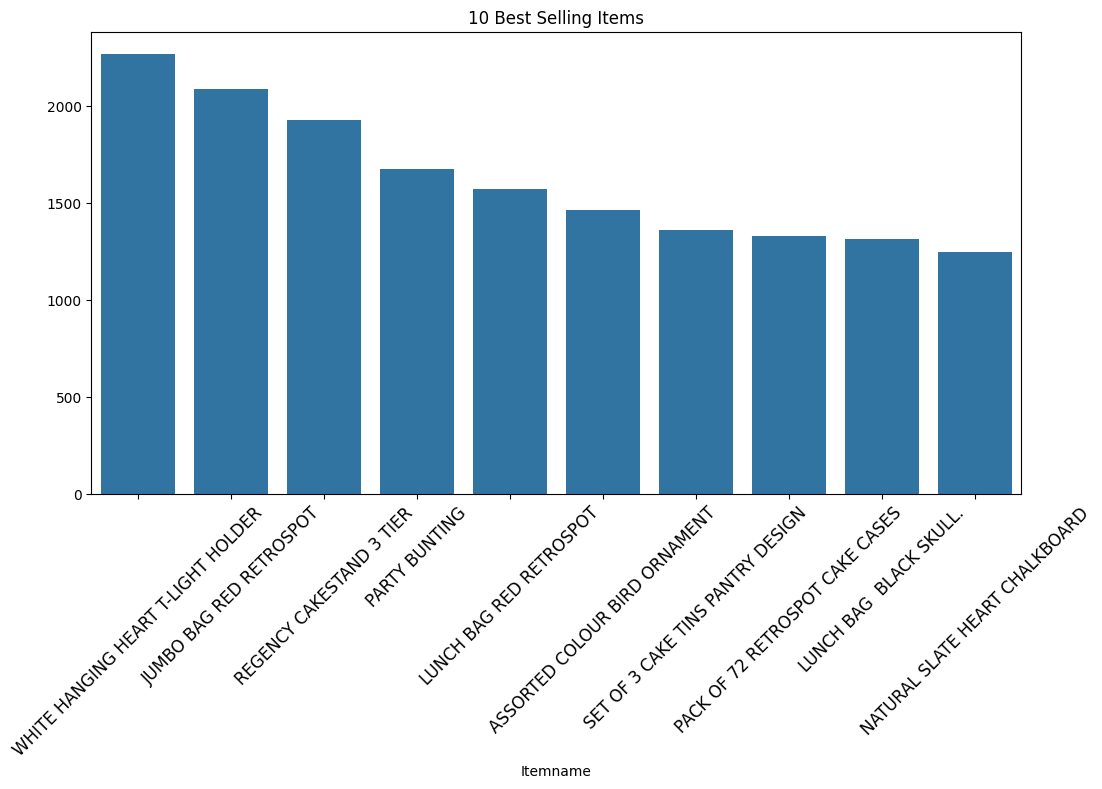

In [27]:
# Create a bar plot for the top 10 best-selling items
plt.figure(figsize=(12,6))

sns.barplot(x = data['Itemname'].value_counts()[:10].index,
           y = data['Itemname'].value_counts()[:10].values)
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items')
plt.show()

In [28]:
# Transaction Aggregation

basket = (data_cleaned.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

basket.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Convert Quantities to Binary Values (0 or 1)

basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0).astype(int)

basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-29-323a73889751>:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Apriori Algorithm

basket_encoded = basket_encoded.astype(bool)

# Apriori algorithm with minimum support of 2% (0.02)
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Frequent itemsets
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.021525,(3 STRIPEY MICE FELTCRAFT)
1,0.039251,(6 RIBBONS RUSTIC CHARM)
2,0.024663,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.034682,(60 TEATIME FAIRY CAKE CASES)
4,0.026424,(72 SWEETHEART FAIRY CAKE CASES)


In [31]:
# Generate Association Rules

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,support,confidence,lift
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.023782,0.821293,22.846529
11,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.027856,0.774885,19.176824
60,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.022406,0.773764,19.149084
6,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.025378,0.730586,17.718426
10,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.027856,0.689373,19.176824
5,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.022626,0.688442,18.176676
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.028847,0.670935,14.254420
63,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.024167,0.666161,6.305790
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.023782,0.661562,22.846529
57,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.024443,0.645349,12.173169


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



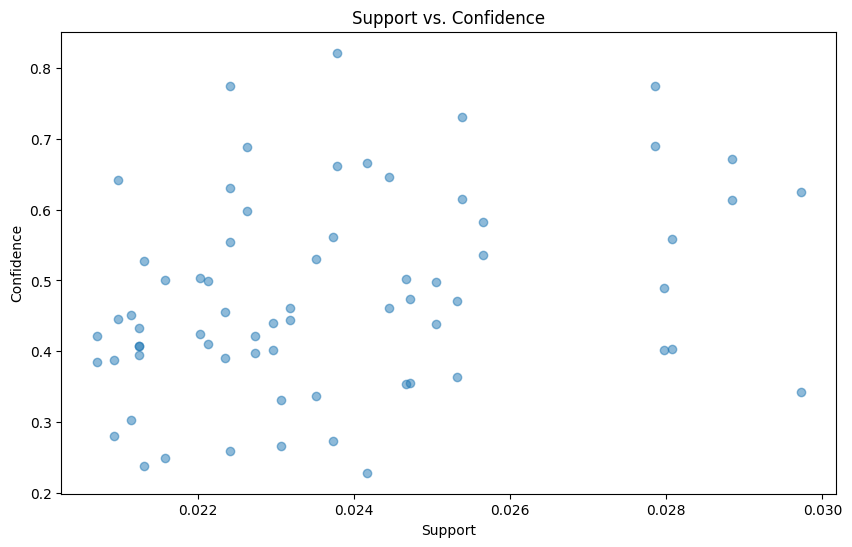

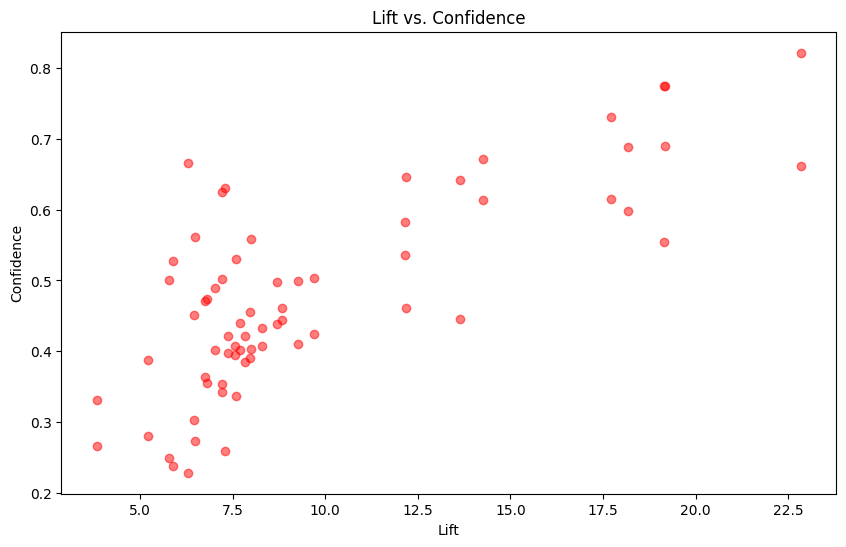

In [32]:
# Visualizaion
# Scatter plot of support vs. confidence
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

# Plotting lift vs confidence
plt.figure(figsize=(10,6))
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5, color='red')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs. Confidence')
plt.show()

In [33]:
# Distribution of Confidence, Lift, and Support
fig = make_subplots(rows=3, cols=1, subplot_titles=('Distribution of Confidence',
                                                    'Distribution of Lift',
                                                    'Distribution of Support'))

# Confidence Histogram
fig.add_trace(
    go.Histogram(x=rules['confidence'], nbinsx=20, histnorm='density', name='Confidence'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=rules['confidence'], y=pd.Series(rules['confidence']).value_counts(normalize=True).sort_index(),
               mode='lines', line=dict(color='red'), name='KDE'),
    row=1, col=1
)

# Lift Histogram
fig.add_trace(
    go.Histogram(x=rules['lift'], nbinsx=20, histnorm='density', name='Lift'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=rules['lift'], y=pd.Series(rules['lift']).value_counts(normalize=True).sort_index(),
               mode='lines', line=dict(color='red'), name='KDE'),
    row=2, col=1
)

# Support Histogram
fig.add_trace(
    go.Histogram(x=rules['support'], nbinsx=20, histnorm='density', name='Support'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=rules['support'], y=pd.Series(rules['support']).value_counts(normalize=True).sort_index(),
               mode='lines', line=dict(color='red'), name='KDE'),
    row=3, col=1
)

# Update axes titles
fig.update_xaxes(title_text="Confidence", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_xaxes(title_text="Lift", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_xaxes(title_text="Support", row=3, col=1)
fig.update_yaxes(title_text="Frequency", row=3, col=1)

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

